# Indexing pandas time series

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Readning and slicing times

In [11]:
df = pd.read_csv('data/temperature_with_date.csv')
df.head()

,Temperature (deg F),Dew Point (deg F),Pressure (atm),Date
0,70.1,50.0,0.0,2014-01-01 00:00:00
1,70.1,50.0,0.0,2014-01-01 01:00:00
2,70.2,50.1,0.0,2014-01-01 02:00:00
3,70.2,50.1,0.0,2014-01-01 03:00:00
4,70.2,50.1,0.0,2014-01-01 04:00:00


In [12]:
df = pd.read_csv('data/temperature_with_date.csv', index_col='Date', parse_dates=True)
df.head()

,Temperature (deg F),Dew Point (deg F),Pressure (atm)
Date,,,
2014-01-01 00:00:00,70.1,50.0,0.0
2014-01-01 01:00:00,70.1,50.0,0.0
2014-01-01 02:00:00,70.2,50.1,0.0
2014-01-01 03:00:00,70.2,50.1,0.0
2014-01-01 04:00:00,70.2,50.1,0.0


In [14]:
df.loc['2014-01-01 01:00:00']

Temperature (deg F)    70.1
Dew Point (deg F)      50.0
Pressure (atm)          0.0
Name: 2014-01-01 01:00:00, dtype: float64

# Creating and using a DatetimeIndex

In [34]:
from datetime import datetime

# 构建奇葩的time series
dates = pd.date_range('2014-01-01 00:00:00', periods=100, freq='1H')
dates = [date.strftime('%Y%m%d %H:%M') for date in dates]
dates[0:5]

['20140101 00:00',
 '20140101 01:00',
 '20140101 02:00',
 '20140101 03:00',
 '20140101 04:00']

In [40]:
# 转成格式化的DatetimeIndex
datetimes = pd.to_datetime(dates, format='%Y-%m-%d %H:%M:%S')
datetimes[0:5]

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00'],
              dtype='datetime64[ns]', freq=None)

In [43]:
# 以DatetimeInde为索引构建Series
series = pd.Series(np.random.randn(100), index = datetimes)
series.head()

2014-01-01 00:00:00    1.179114
2014-01-01 01:00:00    1.144815
2014-01-01 02:00:00   -0.139964
2014-01-01 03:00:00    0.394016
2014-01-01 04:00:00    1.326695
dtype: float64

# Partial string indexing and slicing

In [45]:
series.head()

2014-01-01 00:00:00    1.179114
2014-01-01 01:00:00    1.144815
2014-01-01 02:00:00   -0.139964
2014-01-01 03:00:00    0.394016
2014-01-01 04:00:00    1.326695
dtype: float64

In [47]:
series.loc['2014-01-01 02:00:00']

-0.13996423306414421

In [48]:
series.loc['2014-01-01']

2014-01-01 00:00:00    1.179114
2014-01-01 01:00:00    1.144815
2014-01-01 02:00:00   -0.139964
2014-01-01 03:00:00    0.394016
2014-01-01 04:00:00    1.326695
2014-01-01 05:00:00    0.846242
2014-01-01 06:00:00   -0.284385
2014-01-01 07:00:00    0.132625
2014-01-01 08:00:00   -1.489304
2014-01-01 09:00:00    0.845247
2014-01-01 10:00:00   -0.190809
2014-01-01 11:00:00   -0.052209
2014-01-01 12:00:00    1.838720
2014-01-01 13:00:00   -0.726570
2014-01-01 14:00:00    1.089657
2014-01-01 15:00:00   -2.598899
2014-01-01 16:00:00   -0.752987
2014-01-01 17:00:00    0.432658
2014-01-01 18:00:00   -2.153558
2014-01-01 19:00:00   -1.261777
2014-01-01 20:00:00   -0.054899
2014-01-01 21:00:00    1.733527
2014-01-01 22:00:00    0.288773
2014-01-01 23:00:00   -0.865243
dtype: float64

In [49]:
series.loc['2014-01-01 01:00:00':'2014-01-01 05:00:00']

2014-01-01 01:00:00    1.144815
2014-01-01 02:00:00   -0.139964
2014-01-01 03:00:00    0.394016
2014-01-01 04:00:00    1.326695
2014-01-01 05:00:00    0.846242
dtype: float64

# Reindexing the Index

* Reindexing is useful in preparation for adding or otherwise combining two time series data sets. 
* To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. 
* If data is unavailble for one of the new index dates or times, you must tell pandas how to fill it in. 
* Otherwise, pandas will fill with NaN by default.

In [56]:
ts1 = pd.date_range('2016-07-01', periods=20)
ts1 = pd.Series(range(20), index = ts1)
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
2016-07-18    17
2016-07-19    18
2016-07-20    19
Freq: D, dtype: int64

In [57]:
ts2 = pd.date_range('2016-07-11', periods=20)
ts2 = pd.Series(range(20), index = ts2)
ts2

2016-07-11     0
2016-07-12     1
2016-07-13     2
2016-07-14     3
2016-07-15     4
2016-07-16     5
2016-07-17     6
2016-07-18     7
2016-07-19     8
2016-07-20     9
2016-07-21    10
2016-07-22    11
2016-07-23    12
2016-07-24    13
2016-07-25    14
2016-07-26    15
2016-07-27    16
2016-07-28    17
2016-07-29    18
2016-07-30    19
Freq: D, dtype: int64

In [59]:
# 创建一个新的index，用ts1的来匹配ts2
ts3 = ts2.reindex(ts1.index)
ts3

2016-07-01    NaN
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    NaN
2016-07-05    NaN
2016-07-06    NaN
2016-07-07    NaN
2016-07-08    NaN
2016-07-09    NaN
2016-07-10    NaN
2016-07-11    0.0
2016-07-12    1.0
2016-07-13    2.0
2016-07-14    3.0
2016-07-15    4.0
2016-07-16    5.0
2016-07-17    6.0
2016-07-18    7.0
2016-07-19    8.0
2016-07-20    9.0
Freq: D, dtype: float64

In [60]:
ts4 = ts2.reindex(ts1.index, method = 'ffill')
ts4

2016-07-01    NaN
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    NaN
2016-07-05    NaN
2016-07-06    NaN
2016-07-07    NaN
2016-07-08    NaN
2016-07-09    NaN
2016-07-10    NaN
2016-07-11    0.0
2016-07-12    1.0
2016-07-13    2.0
2016-07-14    3.0
2016-07-15    4.0
2016-07-16    5.0
2016-07-17    6.0
2016-07-18    7.0
2016-07-19    8.0
2016-07-20    9.0
Freq: D, dtype: float64

In [61]:
ts5 = ts2.reindex(ts1.index, method = 'bfill')
ts5

2016-07-01    0
2016-07-02    0
2016-07-03    0
2016-07-04    0
2016-07-05    0
2016-07-06    0
2016-07-07    0
2016-07-08    0
2016-07-09    0
2016-07-10    0
2016-07-11    0
2016-07-12    1
2016-07-13    2
2016-07-14    3
2016-07-15    4
2016-07-16    5
2016-07-17    6
2016-07-18    7
2016-07-19    8
2016-07-20    9
Freq: D, dtype: int64

In [62]:
ts1 + ts2

2016-07-01     NaN
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     NaN
2016-07-05     NaN
2016-07-06     NaN
2016-07-07     NaN
2016-07-08     NaN
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    10.0
2016-07-12    12.0
2016-07-13    14.0
2016-07-14    16.0
2016-07-15    18.0
2016-07-16    20.0
2016-07-17    22.0
2016-07-18    24.0
2016-07-19    26.0
2016-07-20    28.0
2016-07-21     NaN
2016-07-22     NaN
2016-07-23     NaN
2016-07-24     NaN
2016-07-25     NaN
2016-07-26     NaN
2016-07-27     NaN
2016-07-28     NaN
2016-07-29     NaN
2016-07-30     NaN
Freq: D, dtype: float64

In [63]:
ts1 + ts3

2016-07-01     NaN
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     NaN
2016-07-05     NaN
2016-07-06     NaN
2016-07-07     NaN
2016-07-08     NaN
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    10.0
2016-07-12    12.0
2016-07-13    14.0
2016-07-14    16.0
2016-07-15    18.0
2016-07-16    20.0
2016-07-17    22.0
2016-07-18    24.0
2016-07-19    26.0
2016-07-20    28.0
Freq: D, dtype: float64

In [64]:
ts1 + ts4

2016-07-01     NaN
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     NaN
2016-07-05     NaN
2016-07-06     NaN
2016-07-07     NaN
2016-07-08     NaN
2016-07-09     NaN
2016-07-10     NaN
2016-07-11    10.0
2016-07-12    12.0
2016-07-13    14.0
2016-07-14    16.0
2016-07-15    18.0
2016-07-16    20.0
2016-07-17    22.0
2016-07-18    24.0
2016-07-19    26.0
2016-07-20    28.0
Freq: D, dtype: float64

In [65]:
ts1 + ts5

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    12
2016-07-13    14
2016-07-14    16
2016-07-15    18
2016-07-16    20
2016-07-17    22
2016-07-18    24
2016-07-19    26
2016-07-20    28
Freq: D, dtype: int64

# Resampling pandas times series

In [73]:
df = pd.read_csv('data/temperature_with_date.csv', parse_dates=True, index_col='Date')
df.head()

,Temperature,Dew Point,Pressure
Date,,,
2014-01-01 00:00:00,70.1,50.0,0.0
2014-01-01 01:00:00,70.1,50.0,0.0
2014-01-01 02:00:00,70.2,50.1,0.0
2014-01-01 03:00:00,70.2,50.1,0.0
2014-01-01 04:00:00,70.2,50.1,0.0


In [79]:
df1 = df['Temperature'].resample('6H').mean()
df1.head()

Date
2014-01-01 00:00:00    70.166667
2014-01-01 06:00:00    70.366667
2014-01-01 12:00:00    70.500000
2014-01-01 18:00:00    70.666667
2014-01-02 00:00:00    70.916667
Freq: 6H, Name: Temperature, dtype: float64

In [80]:
df2 = df['Temperature'].resample('D').count()
df2.head()

Date
2014-01-01    24
2014-01-02    24
2014-01-03    24
2014-01-04    24
2014-01-05    24
Freq: D, Name: Temperature, dtype: int64

In [81]:
df3 = df['Temperature'].resample('D').sum()
df3.head()

Date
2014-01-01    1690.2
2014-01-02    1709.2
2014-01-03    1737.8
2014-01-04    1763.1
2014-01-05    1787.5
Freq: D, Name: Temperature, dtype: float64

# Separating and resampling

In [82]:
df.head()

,Temperature,Dew Point,Pressure
Date,,,
2014-01-01 00:00:00,70.1,50.0,0.0
2014-01-01 01:00:00,70.1,50.0,0.0
2014-01-01 02:00:00,70.2,50.1,0.0
2014-01-01 03:00:00,70.2,50.1,0.0
2014-01-01 04:00:00,70.2,50.1,0.0


In [84]:
temperature = df['Temperature'].loc['2014-01-10']
temperature

Date
2014-01-10 00:00:00    78.8
2014-01-10 01:00:00    78.8
2014-01-10 02:00:00    78.9
2014-01-10 03:00:00    78.9
2014-01-10 04:00:00    78.9
2014-01-10 05:00:00    78.9
2014-01-10 06:00:00    78.9
2014-01-10 07:00:00    79.0
2014-01-10 08:00:00    79.0
2014-01-10 09:00:00    79.1
2014-01-10 10:00:00    79.1
2014-01-10 11:00:00    79.2
2014-01-10 12:00:00    79.2
2014-01-10 13:00:00    79.3
2014-01-10 14:00:00    79.3
2014-01-10 15:00:00    79.3
2014-01-10 16:00:00    79.3
2014-01-10 17:00:00    79.4
2014-01-10 18:00:00    79.4
2014-01-10 19:00:00    79.4
2014-01-10 20:00:00    79.5
2014-01-10 21:00:00    79.6
2014-01-10 22:00:00    79.6
2014-01-10 23:00:00    79.7
Name: Temperature, dtype: float64

In [87]:
temperature.resample('4h').mean()

Date
2014-01-10 00:00:00    78.850
2014-01-10 04:00:00    78.925
2014-01-10 08:00:00    79.100
2014-01-10 12:00:00    79.275
2014-01-10 16:00:00    79.375
2014-01-10 20:00:00    79.600
Freq: 4H, Name: Temperature, dtype: float64

In [88]:
temperature.resample('4h').sum()

Date
2014-01-10 00:00:00    315.4
2014-01-10 04:00:00    315.7
2014-01-10 08:00:00    316.4
2014-01-10 12:00:00    317.1
2014-01-10 16:00:00    317.5
2014-01-10 20:00:00    318.4
Freq: 4H, Name: Temperature, dtype: float64

# Rolling mean and frequency

In [89]:
df = pd.read_csv('data/temperature_with_date.csv', parse_dates=True, index_col='Date')
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2014-01-01 00:00:00,42.6,34.7,2.8
2014-01-01 01:00:00,42.1,32.7,2.4
2014-01-01 02:00:00,49.2,34.9,2.6
2014-01-01 03:00:00,42.7,38.5,0.1
2014-01-01 04:00:00,49.6,36.6,1.2


In [94]:
unsmoothed = df['Temperature'].loc['2014-August-1' : '2014-August-15']
unsmoothed

Date
2014-08-01 00:00:00    41.9
2014-08-01 01:00:00    44.5
2014-08-01 02:00:00    43.4
2014-08-01 03:00:00    42.9
2014-08-01 04:00:00    48.9
2014-08-01 05:00:00    43.5
2014-08-01 06:00:00    46.1
2014-08-01 07:00:00    49.3
2014-08-01 08:00:00    43.5
2014-08-01 09:00:00    41.0
2014-08-01 10:00:00    44.1
2014-08-01 11:00:00    41.5
2014-08-01 12:00:00    45.0
2014-08-01 13:00:00    45.0
2014-08-01 14:00:00    41.3
2014-08-01 15:00:00    48.1
2014-08-01 16:00:00    41.1
2014-08-01 17:00:00    49.2
2014-08-01 18:00:00    41.0
2014-08-01 19:00:00    47.6
2014-08-01 20:00:00    40.1
2014-08-01 21:00:00    47.5
2014-08-01 22:00:00    49.3
2014-08-01 23:00:00    45.0
2014-08-02 00:00:00    48.4
2014-08-02 01:00:00    48.5
2014-08-02 02:00:00    46.8
2014-08-02 03:00:00    43.2
2014-08-02 04:00:00    49.2
2014-08-02 05:00:00    43.3
                       ... 
2014-08-14 18:00:00    43.7
2014-08-14 19:00:00    40.2
2014-08-14 20:00:00    47.2
2014-08-14 21:00:00    45.4
2014-08-14 22:0

In [93]:
smoothed = unsmoothed.rolling(window=24).mean()
smoothed

Date
2014-08-01 00:00:00          NaN
2014-08-01 01:00:00          NaN
2014-08-01 02:00:00          NaN
2014-08-01 03:00:00          NaN
2014-08-01 04:00:00          NaN
2014-08-01 05:00:00          NaN
2014-08-01 06:00:00          NaN
2014-08-01 07:00:00          NaN
2014-08-01 08:00:00          NaN
2014-08-01 09:00:00          NaN
2014-08-01 10:00:00          NaN
2014-08-01 11:00:00          NaN
2014-08-01 12:00:00          NaN
2014-08-01 13:00:00          NaN
2014-08-01 14:00:00          NaN
2014-08-01 15:00:00          NaN
2014-08-01 16:00:00          NaN
2014-08-01 17:00:00          NaN
2014-08-01 18:00:00          NaN
2014-08-01 19:00:00          NaN
2014-08-01 20:00:00          NaN
2014-08-01 21:00:00          NaN
2014-08-01 22:00:00          NaN
2014-08-01 23:00:00    44.616667
2014-08-02 00:00:00    44.887500
2014-08-02 01:00:00    45.054167
2014-08-02 02:00:00    45.195833
2014-08-02 03:00:00    45.208333
2014-08-02 04:00:00    45.220833
2014-08-02 05:00:00    45.212500
     

In [96]:
august = pd.DataFrame({'smoothed' : smoothed, 'unsmoothed' : unsmoothed})
august

,smoothed,unsmoothed
Date,,
2014-08-01 00:00:00,NaN,41.9
2014-08-01 01:00:00,NaN,44.5
2014-08-01 02:00:00,NaN,43.4
2014-08-01 03:00:00,NaN,42.9
2014-08-01 04:00:00,NaN,48.9
2014-08-01 05:00:00,NaN,43.5
2014-08-01 06:00:00,NaN,46.1
2014-08-01 07:00:00,NaN,49.3
2014-08-01 08:00:00,NaN,43.5


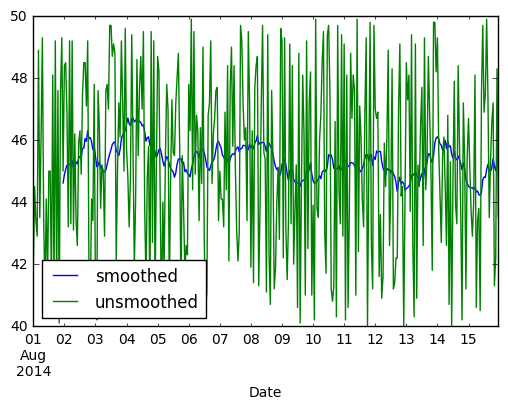

In [97]:
august.plot()
plt.show()

# Resample and roll with it

In [98]:
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2014-01-01 00:00:00,42.6,34.7,2.8
2014-01-01 01:00:00,42.1,32.7,2.4
2014-01-01 02:00:00,49.2,34.9,2.6
2014-01-01 03:00:00,42.7,38.5,0.1
2014-01-01 04:00:00,49.6,36.6,1.2


In [100]:
august = df['Temperature'].loc['2014-August']
august.head()

Date
2014-08-01 00:00:00    41.9
2014-08-01 01:00:00    44.5
2014-08-01 02:00:00    43.4
2014-08-01 03:00:00    42.9
2014-08-01 04:00:00    48.9
Name: Temperature, dtype: float64

In [103]:
daily_highs = august.resample('D').max()
daily_highs

Date
2014-08-01    49.3
2014-08-02    49.2
2014-08-03    49.7
2014-08-04    49.5
2014-08-05    48.8
2014-08-06    49.9
2014-08-07    49.7
2014-08-08    49.7
2014-08-09    49.3
2014-08-10    49.9
2014-08-11    49.9
2014-08-12    49.1
2014-08-13    49.8
2014-08-14    49.3
2014-08-15    49.9
2014-08-16    49.9
2014-08-17    49.4
2014-08-18    50.0
2014-08-19    49.8
2014-08-20    49.9
2014-08-21    47.9
2014-08-22    49.2
2014-08-23    49.6
2014-08-24    49.4
2014-08-25    49.7
2014-08-26    49.1
2014-08-27    49.6
2014-08-28    49.9
2014-08-29    49.8
2014-08-30    49.8
2014-08-31    49.2
Freq: D, Name: Temperature, dtype: float64

In [105]:
daily_highs_smoothed = august.resample('D').max().rolling(window=7).max()
daily_highs_smoothed

Date
2014-08-01     NaN
2014-08-02     NaN
2014-08-03     NaN
2014-08-04     NaN
2014-08-05     NaN
2014-08-06     NaN
2014-08-07    49.9
2014-08-08    49.9
2014-08-09    49.9
2014-08-10    49.9
2014-08-11    49.9
2014-08-12    49.9
2014-08-13    49.9
2014-08-14    49.9
2014-08-15    49.9
2014-08-16    49.9
2014-08-17    49.9
2014-08-18    50.0
2014-08-19    50.0
2014-08-20    50.0
2014-08-21    50.0
2014-08-22    50.0
2014-08-23    50.0
2014-08-24    50.0
2014-08-25    49.9
2014-08-26    49.9
2014-08-27    49.7
2014-08-28    49.9
2014-08-29    49.9
2014-08-30    49.9
2014-08-31    49.9
Freq: D, Name: Temperature, dtype: float64

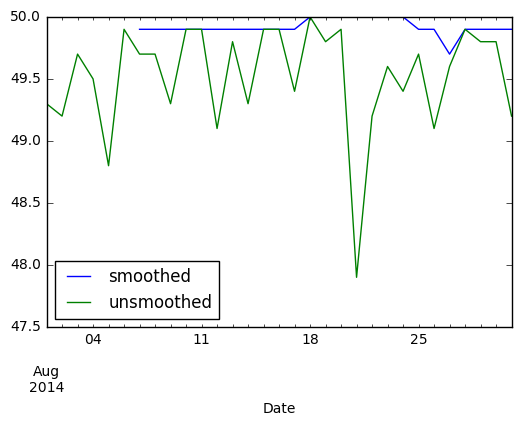

In [109]:
pd.DataFrame({'unsmoothed':daily_highs, 'smoothed':daily_highs_smoothed}).plot()
plt.show()

# Method chaining and filtering

In [119]:
df = pd.read_csv('data/air_plane.csv', parse_dates=True, index_col='date')
df.head()

,city
date,
2014-01-01 00:00:00,!!shenzheng!!
2014-01-01 01:00:00,!beijing
2014-01-01 02:00:00,!!shanghai!
2014-01-01 03:00:00,!!hangzhou!
2014-01-01 04:00:00,!!shenzheng!!


In [120]:
# 删除city中的!
df['city'] = df['city'].str.strip('!')
df.head()

,city
date,
2014-01-01 00:00:00,shenzheng
2014-01-01 01:00:00,beijing
2014-01-01 02:00:00,shanghai
2014-01-01 03:00:00,hangzhou
2014-01-01 04:00:00,shenzheng


In [121]:
wuhan = df['city'].str.contains('wuhan')
wuhan.head()

date
2014-01-01 00:00:00    False
2014-01-01 01:00:00    False
2014-01-01 02:00:00    False
2014-01-01 03:00:00    False
2014-01-01 04:00:00    False
Name: city, dtype: bool

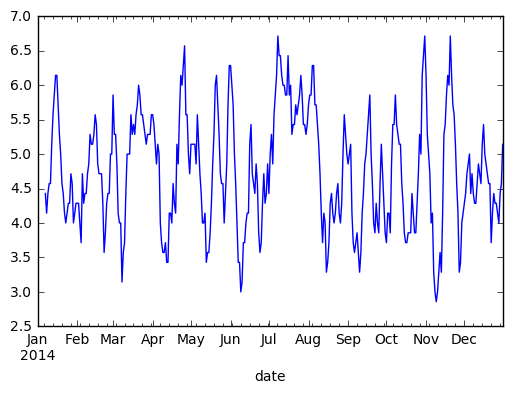

In [125]:
# 每天起飞的航班数量
wuhan.resample('D').sum().rolling(window=7).mean().plot()
plt.show()